In [1]:
import random

%matplotlib inline
import networkx as nx


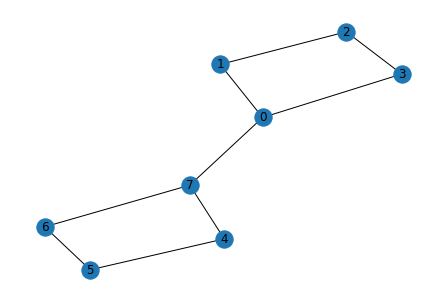

In [6]:
G = nx.Graph()
nx.add_cycle(G,[0, 1, 2, 3])
nx.add_cycle(G,[4, 5, 6, 7])
G.add_edge(0, 7)
nx.draw(G, with_labels=True)

In [7]:
partition = [
    {1, 2, 3},
    {4, 5, 6},
    {0, 7},
]

In [8]:
nx.community.is_partition(G, partition)

True

In [9]:
partition_map = {}
for idx, cluster_nodes in enumerate(partition):
    for node in cluster_nodes:
        partition_map[node] = idx

partition_map

{1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 0: 2, 7: 2}

In [10]:
partition_map[0] == partition_map[7]

True

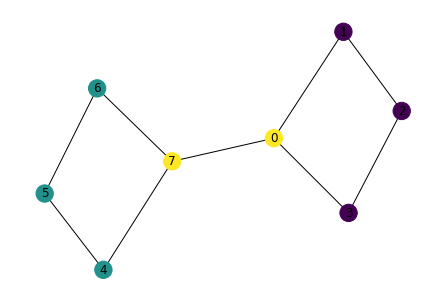

In [11]:
node_colors = [partition_map[n] for n in G.nodes]
        
nx.draw(G, node_color=node_colors, with_labels=True)

In [13]:
def modularity(G, partition):
    W = sum(G.edges[v, w].get('weight', 1) for v, w in G.edges)
    summation = 0
    for cluster_nodes in partition:
        s_c = sum(G.degree(n, weight='weight') for n in cluster_nodes)
        # Use subgraph to count only internal links
        C = G.subgraph(cluster_nodes)
        W_c = sum(C.edges[v, w].get('weight', 1) for v, w in C.edges)
        summation += W_c - s_c ** 2 / (4 * W)
    
    return summation / W

In [14]:
modularity(G, partition)

0.2222222222222222

In [15]:
partition_2 = [
    {0, 1, 2, 3},
    {4, 5, 6, 7},
]
modularity(G, partition_2)

0.3888888888888889

In [16]:
nx.community.quality.modularity(G, partition_2)

0.38888888888888884

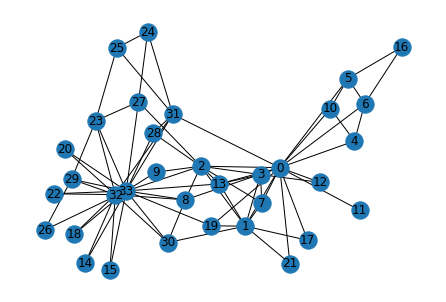

In [25]:
K = nx.karate_club_graph()
nx.draw(K, with_labels=True)


In [26]:
K.nodes[0]

{'club': 'Mr. Hi'}

In [28]:
K.nodes[9]

{'club': 'Officer'}

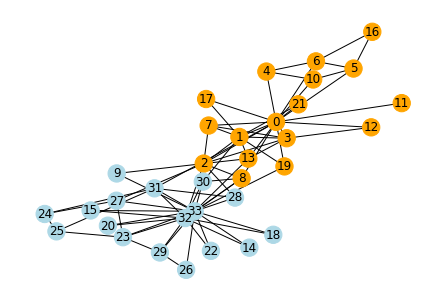

In [29]:
K = nx.karate_club_graph()
club_color = {
    'Mr. Hi': 'orange',
    'Officer': 'lightblue',
}
node_colors = [club_color[K.nodes[n]['club']] for n in K.nodes]
nx.draw(K, node_color=node_colors, with_labels=True)

In [31]:
groups = {
    'Mr. Hi': set(),
    'Officer': set(),
}

for n in K.nodes:
    club = K.nodes[n]['club']
    groups[club].add(n)
    
groups

{'Mr. Hi': {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21},
 'Officer': {9,
  14,
  15,
  18,
  20,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33}}

In [32]:
empirical_partition = list(groups.values())
empirical_partition

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21},
 {9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}]

In [33]:
nx.community.is_partition(K, empirical_partition)

True

In [34]:
nx.community.quality.modularity(K, empirical_partition)

0.3582347140039448

In [35]:
random_nodes = random.sample(K.nodes, 17)
random_partition = [set(random_nodes),
                    set(K.nodes) - set(random_nodes)]
random_partition

C:\Users\User\AppData\Local\Temp/ipykernel_1944/653002193.py:1: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_nodes = random.sample(K.nodes, 17)


[{0, 2, 3, 4, 5, 8, 10, 11, 12, 16, 19, 21, 22, 24, 25, 27, 33},
 {1, 6, 7, 9, 13, 14, 15, 17, 18, 20, 23, 26, 28, 29, 30, 31, 32}]

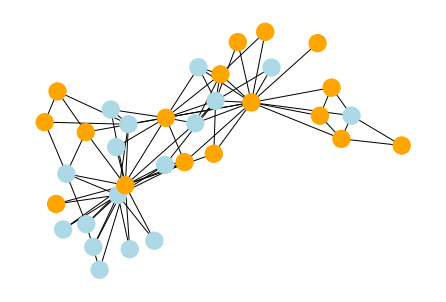

In [36]:
random_node_colors = ['orange' if n in random_nodes else 'lightblue' for n in K.nodes]
nx.draw(K, node_color=random_node_colors)
